In [ ]:
#id - Unique ID for each home sold 

#date - Date of the home sale 

#price - Price of each home sold 

#bedrooms - Number of bedrooms 

#bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 

#sqft_living - Square footage of the apartments interior living space 

#sqft_lot - Square footage of the land space 

#floors - Number of floors 

#waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 

#view - An index from 0 to 4 of how good the view of the property was 

#condition - An index from 1 to 5 on the condition of the apartment, 

#grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

#sqft_above - The square footage of the interior housing space that is above ground level 

#sqft_basement - The square footage of the interior housing space that is below ground level 

#yr_built - The year the house was initially built 

#yr_renovated - The year of the house’s last renovation 

#zipcode - What zipcode area the house is in 

#lat - Lattitude 

#long - Longitude 

#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 

#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

========================Подготовка========================

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn import linear_model
from sklearn import metrics
from scipy import stats
from sklearn.impute import SimpleImputer

In [2]:
from google.colab import drive
drive.mount ('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
houses_data = pd.read_csv("/content/drive/My Drive/kc_house_data.csv",sep=',', nrows=1000)
houses_data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7437100570,20140821T000000,291000.0,4,2.50,1860,6325,2.0,0,0,...,7,1860,0,1991,0,98038,47.3492,-122.030,1860,6449
996,8856004730,20140917T000000,199950.0,2,2.75,1590,20917,1.5,0,0,...,5,1590,0,1920,0,98001,47.2786,-122.250,1310,6000
997,3856902996,20140804T000000,553500.0,2,1.00,850,2340,1.0,0,0,...,7,850,0,1922,0,98105,47.6707,-122.328,1300,3000
998,1442800370,20150415T000000,189950.0,2,1.00,1030,4188,1.0,0,0,...,8,1030,0,1981,0,98038,47.3738,-122.057,1450,3376


========================Удаление повторений========================

In [4]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   date           1000 non-null   object 
 2   price          1000 non-null   float64
 3   bedrooms       1000 non-null   int64  
 4   bathrooms      1000 non-null   float64
 5   sqft_living    1000 non-null   int64  
 6   sqft_lot       1000 non-null   int64  
 7   floors         1000 non-null   float64
 8   waterfront     1000 non-null   int64  
 9   view           1000 non-null   int64  
 10  condition      1000 non-null   int64  
 11  grade          1000 non-null   int64  
 12  sqft_above     1000 non-null   int64  
 13  sqft_basement  1000 non-null   int64  
 14  yr_built       1000 non-null   int64  
 15  yr_renovated   1000 non-null   int64  
 16  zipcode        1000 non-null   int64  
 17  lat            1000 non-null   float64
 18  long     

In [5]:
houses_data = houses_data.drop_duplicates(keep = False)
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   date           1000 non-null   object 
 2   price          1000 non-null   float64
 3   bedrooms       1000 non-null   int64  
 4   bathrooms      1000 non-null   float64
 5   sqft_living    1000 non-null   int64  
 6   sqft_lot       1000 non-null   int64  
 7   floors         1000 non-null   float64
 8   waterfront     1000 non-null   int64  
 9   view           1000 non-null   int64  
 10  condition      1000 non-null   int64  
 11  grade          1000 non-null   int64  
 12  sqft_above     1000 non-null   int64  
 13  sqft_basement  1000 non-null   int64  
 14  yr_built       1000 non-null   int64  
 15  yr_renovated   1000 non-null   int64  
 16  zipcode        1000 non-null   int64  
 17  lat            1000 non-null   float64
 18  long     

========================Boxplot признаков========================

(array([ 38., 280., 279., 202., 105.,  43.,  26.,  19.,   5.,   3.]),
 array([ 380.,  949., 1518., 2087., 2656., 3225., 3794., 4363., 4932.,
        5501., 6070.]),
 <a list of 10 Patch objects>)

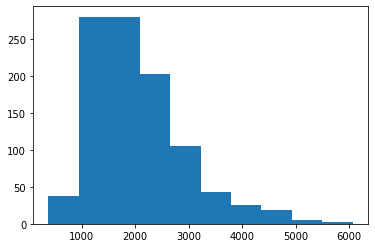

In [6]:
plt.hist(houses_data.sqft_living)

{'boxes': [<matplotlib.lines.Line2D at 0x7f1ee0ee2b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1ee0e78b90>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1ee0ee9bd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1ee0ee9690>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1ee0e78110>,
  ...]}

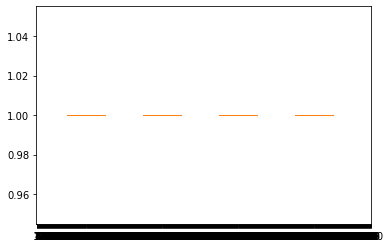

In [7]:
sqft_living_array = np.asarray(houses_data.sqft_living)
sqft_living_array = sqft_living_array.reshape(-1,1)
sqft_living_normalized = preprocessing.normalize(sqft_living_array)
sqft_living_normalized = sqft_living_normalized.reshape(1,-1)

plt.boxplot(sqft_living_normalized)

========================Корреляция========================

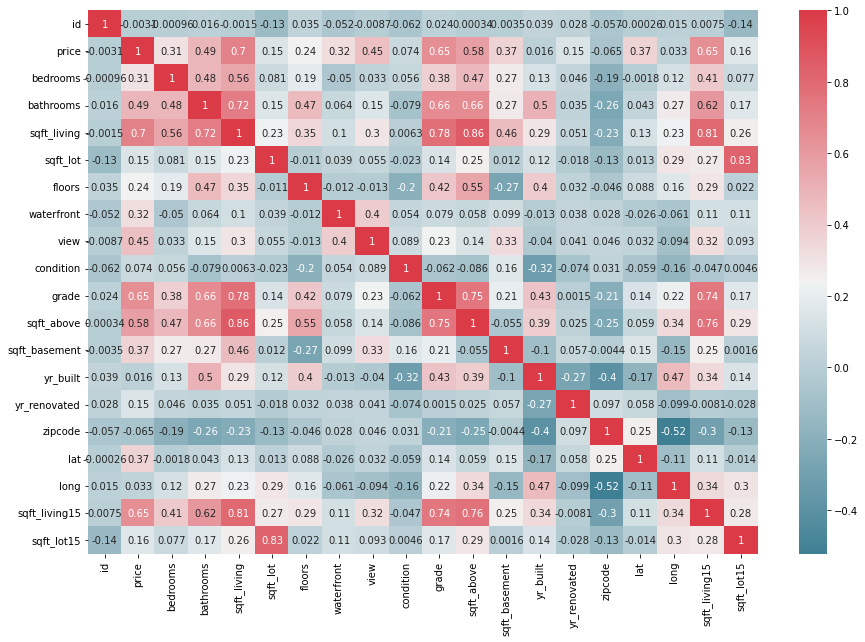

In [8]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(houses_data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(houses_data)

========================Регрессия========================



========================Простая Линейная========================

In [9]:
y = houses_data.price
x = sqft_living_array

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, shuffle=True)

In [10]:
regression = linear_model.LinearRegression()
regression2 = linear_model.Lasso()

In [11]:
regression.fit(x_train, y_train)
pred=regression.predict(x_test)

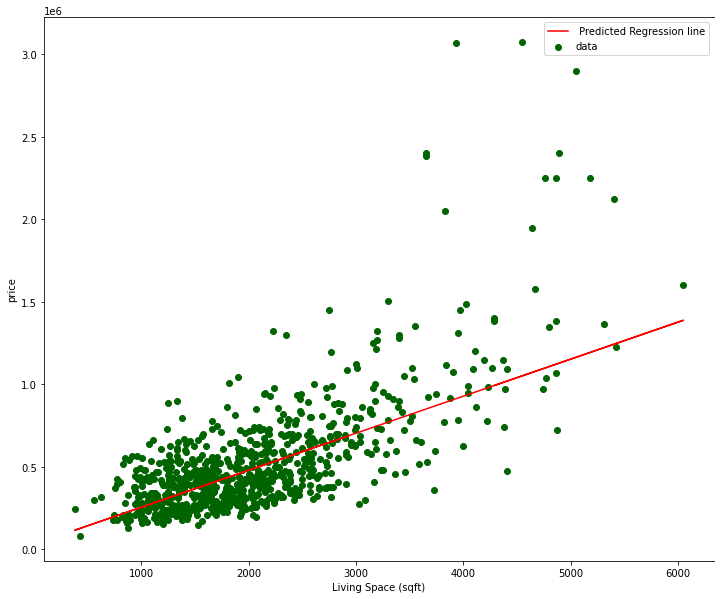

In [13]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, pred, color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [21]:
stats.pearsonr(y_test, pred)

(0.710142185209355, 9.785918672422966e-124)

In [22]:
stats.spearmanr(y_test,pred)

SpearmanrResult(correlation=0.6292064657636061, pvalue=2.0577264140632424e-89)

========================ЛАССО========================

In [14]:
regression2.fit(x_train, y_train)
pred2=regression2.predict(x_test)

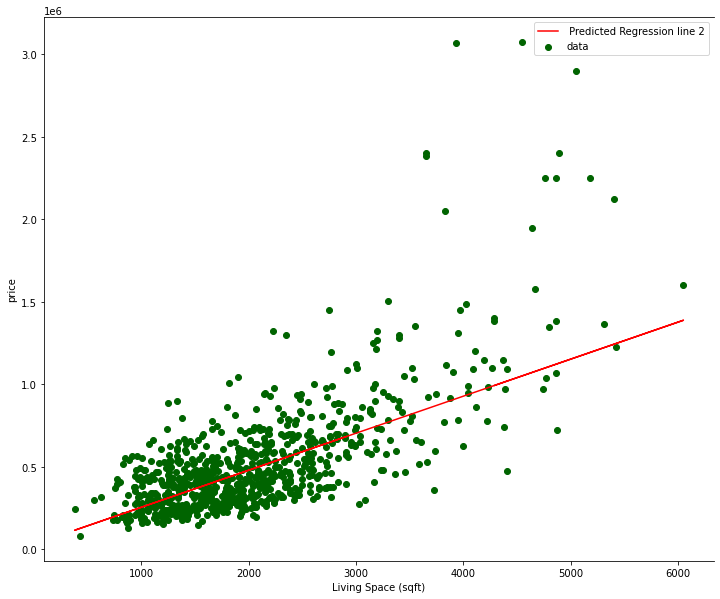

In [16]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, pred2, color='red', label= ' Predicted Regression line 2')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [23]:
stats.pearsonr(y_test, pred2)

(0.710142185209355, 9.785918672422966e-124)

In [24]:
stats.spearmanr(y_test, pred2)

SpearmanrResult(correlation=0.6292064657636061, pvalue=2.0577264140632424e-89)

In [ ]:
grid_params = {
    'fit_intercept':[True, False],
    'normalize': [True, False]
}

LR_thing = GridSearchCV(regression2, grid_params, verbose=1, cv=10, n_jobs=-1)
LR_thing_result = LR_thing.fit(x_train, y_train)

y_pred_LR_thing = LR_thing_result.predict(x_test)

print(classification_report(y_test, y_pred_LR_thing))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


ValueError: ignored